## 1. Check that MET computation works

### Compute MET and compare it to MET branch (for PF cands)

In [130]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [131]:
## in this file PUPPI == PF candidates
#file_path = "/eos/cms/store/cmst3/group/l1tr/elfontan/l1tPFplusPuppi/fp_ntuples_NNVtx_151X/TT_PU200/FP/151Xv0/perfNano_16283968_110.root"
file_path = "/eos/cms/store/cmst3/group/l1tr/elfontan/l1tPFplusPuppi/fp_ntuples_NNVtx_151X/TT_PU200/FP/151Xv0/perfNano_16283968_0.root"

file = uproot.open(file_path)
events = file["Events"]
print("Branches in 'Events':")
print(events.keys())

FileNotFoundError: file not found

    '/eos/cms/store/cmst3/group/l1tr/elfontan/l1tPFplusPuppi/fp_ntuples_NNVtx_151X/TT_PU200/FP/151Xv0/perfNano_16283968_0.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [24]:
pf_pt = events["L1PFCands_pt"].array()
pf_phi = events["L1PFCands_phi"].array()
pf_eta = events["L1PFCands_eta"].array()
pf_mass = events["L1PFCands_mass"].array()

In [ ]:
pf_met_x = [-np.sum(pt * np.cos(phi)) for pt, phi in zip(pf_pt, pf_phi)]
pf_met_y = [-np.sum(pt * np.sin(phi)) for pt, phi in zip(pf_pt, pf_phi)]
pf_met = [np.sqrt(mx**2 + my**2) for mx, my in zip(pf_met_x, pf_met_y)]

In [30]:
pf_met_stored = events["L1PFMet_pt"].array()
pf_met_diff = np.array(pf_met) - np.array(pf_met_stored)
print("First 10 calculated vs stored MET:")
for i in range(10):
    print(pf_met_diff[i])
    if pf_met_diff[i] > 0 or pf_met_diff[i] < 0:
        print(f"Event {i}: calc={pf_met[i]:.2f}, stored={pf_met_stored[i]:.2f}, diff={pf_met_diff[i]:.2f}")

First 10 calculated vs stored MET:
4.170326711516736e-06
Event 0: calc=21.30, stored=21.30, diff=0.00
-5.244681752003544e-06
Event 1: calc=37.65, stored=37.65, diff=-0.00
2.208951548254845e-05
Event 2: calc=211.51, stored=211.51, diff=0.00
-3.1015786703392223e-06
Event 3: calc=223.31, stored=223.31, diff=-0.00
4.330513546335624e-05
Event 4: calc=62.80, stored=62.80, diff=0.00
8.225701151332032e-06
Event 5: calc=100.62, stored=100.62, diff=0.00
5.401720547304478e-06
Event 6: calc=7.45, stored=7.45, diff=0.00
-4.5509757882200574e-06
Event 7: calc=29.26, stored=29.26, diff=-0.00
-8.801747014786088e-06
Event 8: calc=165.65, stored=165.65, diff=-0.00
-1.826362518997371e-05
Event 9: calc=28.66, stored=28.66, diff=-0.00


### Double Check: do the same for PUPPI candidates

In [31]:
puppi_pt = events["L1PuppiCands_pt"].array()
puppi_phi = events["L1PuppiCands_phi"].array()
puppi_eta = events["L1PuppiCands_eta"].array()
puppi_mass = events["L1PuppiCands_mass"].array()

In [32]:
puppi_met_x = [-np.sum(pt * np.cos(phi)) for pt, phi in zip(puppi_pt, puppi_phi)]
puppi_met_y = [-np.sum(pt * np.sin(phi)) for pt, phi in zip(puppi_pt, puppi_phi)]
puppi_met = [np.sqrt(mx**2 + my**2) for mx, my in zip(puppi_met_x, puppi_met_y)]

In [33]:
puppi_met_stored = events["L1PuppiMet_pt"].array()
puppi_met_diff = np.array(puppi_met) - np.array(puppi_met_stored)
print("First 10 calculated vs stored MET:")
for i in range(10):
    print(puppi_met_diff[i])
    if puppi_met_diff[i] > 0 or puppi_met_diff[i] < 0:
        print(f"Event {i}: calc={puppi_met[i]:.2f}, stored={puppi_met_stored[i]:.2f}, diff={puppi_met_diff[i]:.2f}")

First 10 calculated vs stored MET:
-1.4591270648622867e-05
Event 0: calc=21.30, stored=21.30, diff=-0.00
-7.649041286583724e-06
Event 1: calc=37.65, stored=37.65, diff=-0.00
1.6173920869277936e-06
Event 2: calc=211.51, stored=211.51, diff=0.00
-1.448574357709731e-05
Event 3: calc=223.31, stored=223.31, diff=-0.00
1.9577219084965236e-05
Event 4: calc=62.80, stored=62.80, diff=0.00
2.4152003874178263e-05
Event 5: calc=100.62, stored=100.62, diff=0.00
5.401720547304478e-06
Event 6: calc=7.45, stored=7.45, diff=0.00
2.173514872083615e-05
Event 7: calc=27.98, stored=27.98, diff=0.00
-1.4587412067612604e-05
Event 8: calc=167.22, stored=167.22, diff=-0.00
-1.7711426515631956e-05
Event 9: calc=28.66, stored=28.66, diff=-0.00


### Some Plotting

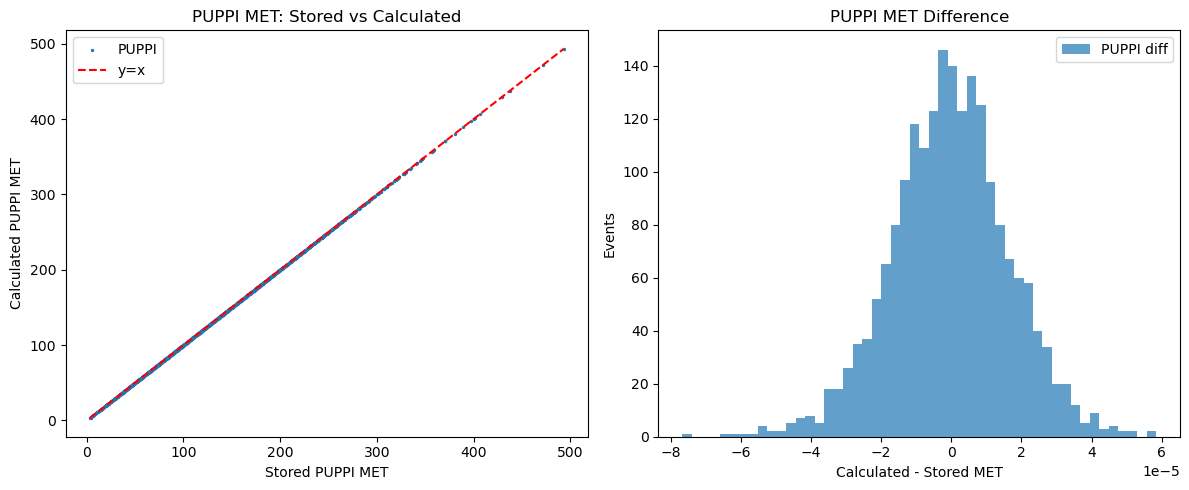

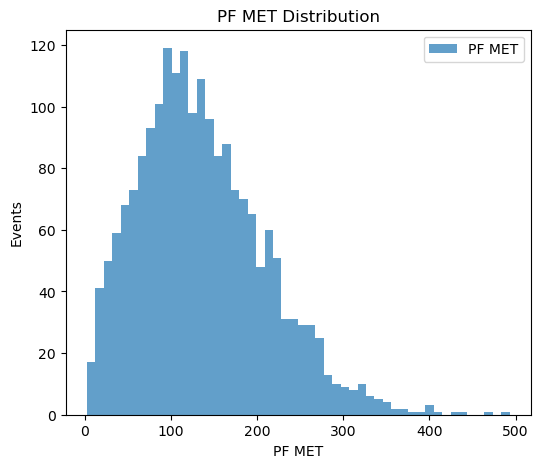

In [34]:
# Plot MET comparisons
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(puppi_met_stored, puppi_met, s=2, label='PUPPI')
plt.plot([min(puppi_met_stored), max(puppi_met_stored)], [min(puppi_met_stored), max(puppi_met_stored)], 'r--', label='y=x')
plt.xlabel('Stored PUPPI MET')
plt.ylabel('Calculated PUPPI MET')
plt.legend()
plt.title('PUPPI MET: Stored vs Calculated')

plt.subplot(1,2,2)
plt.hist(puppi_met_diff, bins=50, alpha=0.7, label='PUPPI diff')
plt.xlabel('Calculated - Stored MET')
plt.ylabel('Events')
plt.title('PUPPI MET Difference')
plt.legend()
plt.tight_layout()
plt.show()

# PF MET distribution
plt.figure(figsize=(6,5))
plt.hist(pf_met, bins=50, alpha=0.7, label='PF MET')
plt.xlabel('PF MET')
plt.ylabel('Events')
plt.title('PF MET Distribution')
plt.legend()
plt.show()

---
## Check that puppi weights work


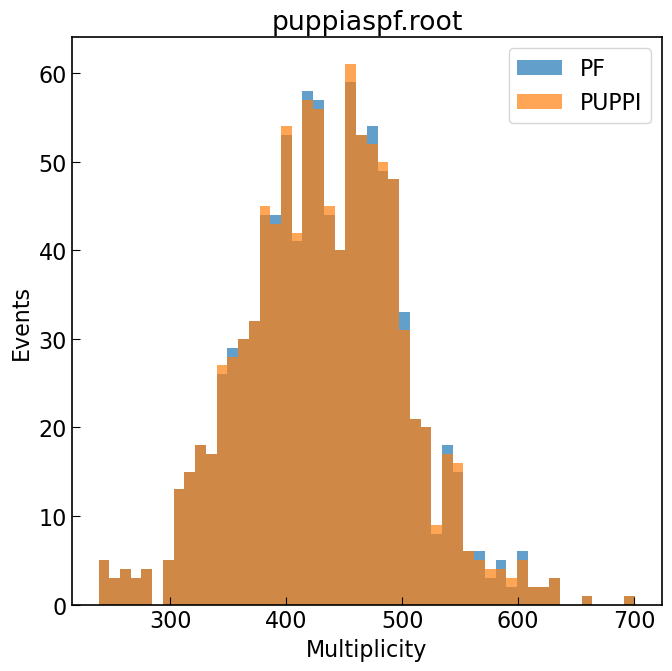

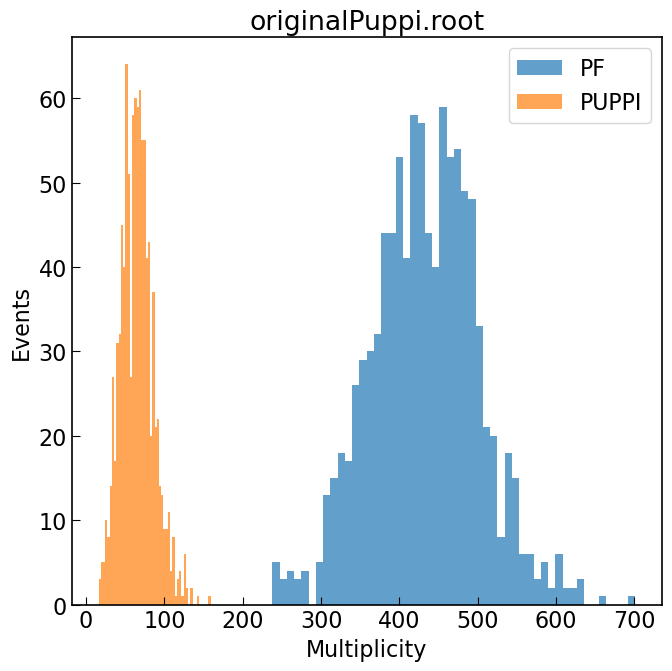

In [62]:
## I have 2 files from the same 200 events: in one the puppi collection is same as pf, in the other puppi has the cuts applied

## Check that the files are produced correctly
file_pf_eq_puppi = "/afs/cern.ch/user/f/friti/work/fastpuppi/Oct2025/CMSSW_15_1_0_pre4/src/FastPUPPI/NtupleProducer/python/perfNano_puppiaspf_correct.root"
file_puppi_subset_pf = "/afs/cern.ch/user/f/friti/work/fastpuppi/Oct2025/CMSSW_15_1_0_pre4/src/FastPUPPI/NtupleProducer/python/perfNano_realpuppi.root"

# Open files and get multiplicities
f1 = uproot.open(file_pf_eq_puppi)["Events"]
f2 = uproot.open(file_puppi_subset_pf)["Events"]

n_pf_1 = f1["nL1PFCands"].array()
n_puppi_1 = f1["nL1PuppiCands"].array()

n_pf_2 = f2["nL1PFCands"].array()
n_puppi_2 = f2["nL1PuppiCands"].array()

# Plot multiplicities
plt.figure(figsize=(7,7))
plt.hist(n_pf_1, bins=50, alpha=0.7, label='PF')
plt.hist(n_puppi_1, bins=50, alpha=0.7, label='PUPPI')
plt.xlabel('Multiplicity')
plt.ylabel('Events')
plt.title('puppiaspf.root')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(7,7))



plt.hist(n_pf_2, bins=50, alpha=0.7, label='PF')
plt.hist(n_puppi_2, bins=50, alpha=0.7, label='PUPPI')
plt.xlabel('Multiplicity')
plt.ylabel('Events')
plt.title('originalPuppi.root')
plt.legend()

plt.tight_layout()
plt.show()

In [123]:
events_pf_eq_puppi = uproot.open(file_pf_eq_puppi)["Events"]

pt = events_pf_eq_puppi["L1PuppiCands_pt"].array()
phi = events_pf_eq_puppi["L1PuppiCands_phi"].array()
eta = events_pf_eq_puppi["L1PuppiCands_eta"].array()
mass = events_pf_eq_puppi["L1PuppiCands_mass"].array()
weight = events_pf_eq_puppi["L1PuppiCands_puppiWeight"].array()
charge = events_pf_eq_puppi["L1PuppiCands_charge"].array()
nnVtxScore = events_pf_eq_puppi["L1PuppiCands_nnVtxScore"].array()
pdgid = events_pf_eq_puppi["L1PuppiCands_pdgId"].array()

selected_counts = []
selected_pts = []     # list of lists
selected_etas = []
selected_phis = []
selected_masses = []
selected_effective_pts = []  # pt after weighting (for MET)

for iev in range(len(pt)):

    sel_pt = []
    sel_eta = []
    sel_phi = []
    sel_mass = []
    sel_effpt = []   # pt used in MET (pt*weight or pt)

    for pt_i, weight_i, charge_i, nnVtxScore_i, eta_i, phi_i, mass_i, pdgid_i in zip(
            pt[iev], weight[iev], charge[iev], nnVtxScore[iev],
            eta[iev], phi[iev], mass[iev], pdgid[iev]):

        abs_eta = abs(eta_i)

        ###############
        # Barrel
        ###############
        if abs_eta < 1.5:

            if charge_i == 0:
                if pt_i * weight_i > 1.0:
                    eff_pt = pt_i * weight_i
                    sel_pt.append(pt_i)
                    sel_eta.append(eta_i)
                    sel_phi.append(phi_i)
                    sel_mass.append(mass_i)
                    sel_effpt.append(eff_pt)
            if charge_i !=0:
                if nnVtxScore_i > 0.1:
                    eff_pt = pt_i
                    sel_pt.append(pt_i)
                    sel_eta.append(eta_i)
                    sel_phi.append(phi_i)
                    sel_mass.append(mass_i)
                    sel_effpt.append(eff_pt)
        ###############
        # HGCAL with TK
        ###############
        if 1.5 < abs_eta < 2.5:

            if charge_i == 0:
                if pt_i * weight_i > 1:
                    eff_pt = pt_i * weight_i
                    sel_pt.append(pt_i)
                    sel_eta.append(eta_i)
                    sel_phi.append(phi_i)
                    sel_mass.append(mass_i)
                    sel_effpt.append(eff_pt)

            if charge_i !=0:
                if nnVtxScore_i > 0.1:
                    eff_pt = pt_i
                    sel_pt.append(pt_i)
                    sel_eta.append(eta_i)
                    sel_phi.append(phi_i)
                    sel_mass.append(mass_i)
                    sel_effpt.append(eff_pt)
        ###############
        # HGCAL no-TK
        ###############
        elif 2.5 < abs_eta < 3.0:
            continue  # your original code skipped them

        ###############
        # HF
        ###############
        elif 3.0 < abs_eta < 5.2:
            continue  # skipped in your code
    # store per-event results to compute the MET later
    selected_counts.append(len(sel_effpt))     # same as before, but using final selected
    selected_pts.append(sel_pt)
    selected_etas.append(sel_eta)
    selected_phis.append(sel_phi)
    selected_masses.append(sel_mass)
    selected_effective_pts.append(sel_effpt)



In [127]:
# Only barrel candidates for the original PUPPI (puppi != pf file)
events_puppi_subset = uproot.open(file_puppi_subset_pf)["Events"]

puppi_pt_orig = events_puppi_subset["L1PuppiCands_pt"].array()
puppi_eta_orig = events_puppi_subset["L1PuppiCands_eta"].array()
puppi_charge_orig = events_puppi_subset["L1PuppiCands_charge"].array()
pdgid = events_puppi_subset["L1PuppiCands_pdgId"].array()


barrel_counts = []
for iev in range(len(puppi_pt_orig)):
    count = 0
    for pt_i, eta_i, charge_i, pdgid_i in zip(puppi_pt_orig[iev], puppi_eta_orig[iev], puppi_charge_orig[iev], pdgid[iev]):
        if abs(eta_i) < 1.5:

            if charge_i == 0:
                    #print(pt_i)
                    count += 1
            if charge_i != 0:
                #print(pt_i)
                count += 1

        if abs(eta_i)>1.5 and abs(eta_i)<2.5:

            if charge_i == 0:
                #print(pt_i)
                count += 1

            if charge_i != 0:
                #print(pt_i)
                count += 1
        if abs(eta_i)>2.5 and abs(eta_i)<3.0:  # HGCal without TK
            if charge_i == 0:
                #print(pt_i)
                count += 1
            if charge_i != 0:
                #print(pt_i)
                count += 1
        if abs(eta_i)>3 and abs(eta_i)<5.2:  # HF
            if charge_i == 0:
                #print(pt_i)
                count += 1
            if charge_i != 0:
                #print(pt_i)
                count += 1
    barrel_counts.append(count)

print("First 100 events: number of barrel PUPPI candidates (original PUPPI collection)")
for i in range(10):
    print(f"Event {i}: {barrel_counts[i]} candidates")

First 100 events: number of barrel PUPPI candidates (original PUPPI collection)
Event 0: 77 candidates
Event 1: 64 candidates
Event 2: 67 candidates
Event 3: 30 candidates
Event 4: 91 candidates
Event 5: 81 candidates
Event 6: 74 candidates
Event 7: 90 candidates
Event 8: 43 candidates
Event 9: 74 candidates


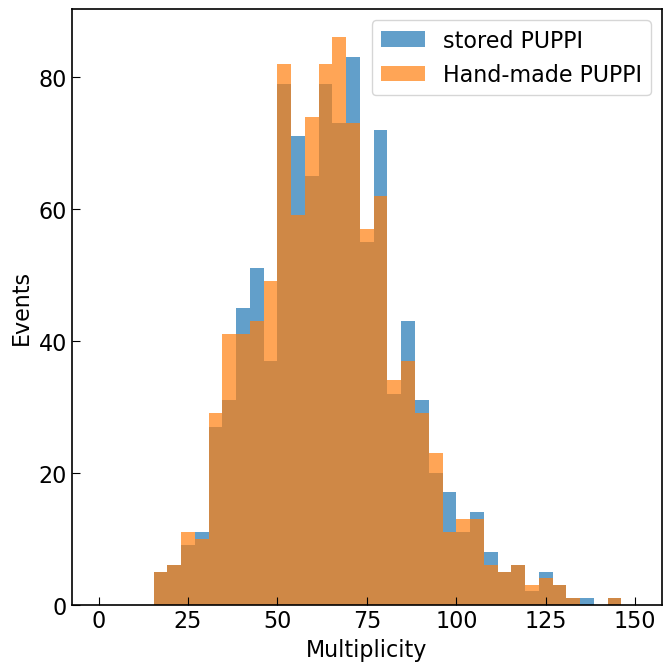

In [129]:
# Compare PUPPI and hand-made puppi multiplicities
plt.figure(figsize=(7,7))

bins = np.linspace(0, 150, 40)  # 10 bins from 0 to 30
plt.hist(barrel_counts, bins=bins, alpha=0.7, label='stored PUPPI')
plt.hist(selected_counts, bins=bins, alpha=0.7, label='Hand-made PUPPI')
plt.xlabel('Multiplicity')
plt.ylabel('Events')
plt.legend()


plt.tight_layout()
plt.show()

## Compute MET with the new PUPPI collection

In [58]:
## Compute MET with the hand-made puppi weight puppi collection


met_x = [-np.sum(pt * np.cos(phi)) for pt, phi in zip(selected_pts, selected_phis)]
met_y = [-np.sum(pt * np.sin(phi)) for pt, phi in zip(selected_pts, selected_phis)]
met = [np.sqrt(mx**2 + my**2) for mx, my in zip(met_x, met_y)]

met_stored = f2["L1PuppiMetCentral_pt"].array() ## MET from the original PUPPI file
genMet = f2["genMetCentral_pt"].array() 
#genMet = f2["genMet_pt"].array() 

met_diff = np.array(met) - np.array(met_stored)
print("First 10 calculated vs stored MET:")
for i in range(10):
    print(met_diff[i])
    if met_diff[i] > 0 or met_diff[i] < 0:
        print(f"Event {i}: calc={met[i]:.2f}, stored={met_stored[i]:.2f}, diff={met_diff[i]:.2f}")

First 10 calculated vs stored MET:
41.47315839920478
Event 0: calc=114.61, stored=73.14, diff=41.47
2.789081140709655
Event 1: calc=55.20, stored=52.41, diff=2.79
18.940674659384925
Event 2: calc=89.18, stored=70.24, diff=18.94
19.99310618454993
Event 3: calc=194.30, stored=174.30, diff=19.99
-14.638447254732064
Event 4: calc=53.57, stored=68.21, diff=-14.64
-4.41040021874425
Event 5: calc=57.88, stored=62.29, diff=-4.41
3.5460518458770593
Event 6: calc=190.72, stored=187.18, diff=3.55
-17.568418130224632
Event 7: calc=31.68, stored=49.25, diff=-17.57
8.350721020617328
Event 8: calc=43.13, stored=34.78, diff=8.35
6.4945350490485225
Event 9: calc=125.67, stored=119.17, diff=6.49


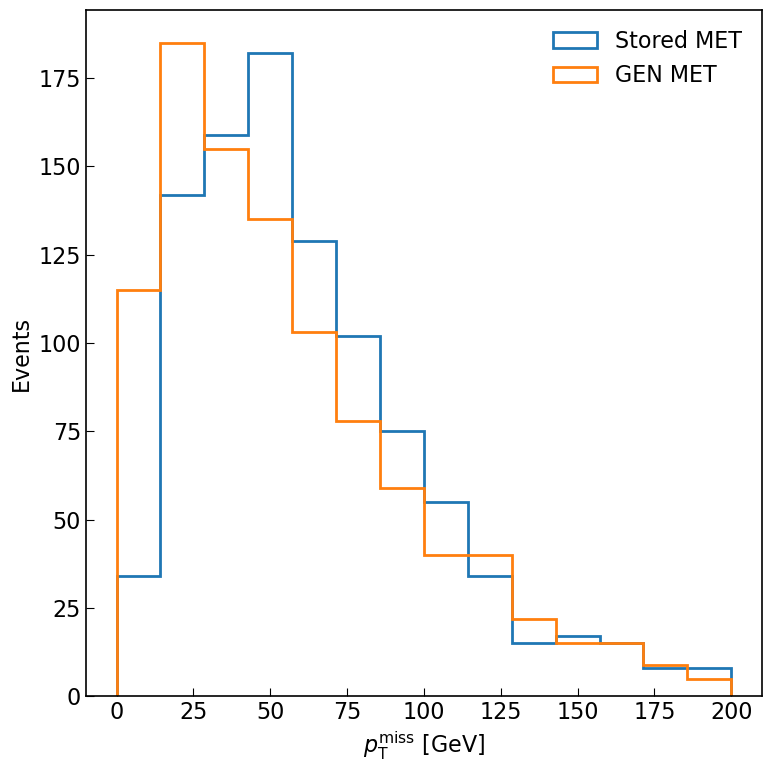

Integral recomputed MET: 972
Integral stored MET: 975


In [114]:
## Compare GEN MET with GEN PUPPI MET stored


met_stored = f2["L1PuppiMetCentral_pt"].array() ## MET from the original PUPPI file
genMet = f1["genMetCentral_pt"].array() 

# ---------- CMS Style ----------
plt.style.use('default')
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.size'] = 3

# ---------- Plot ----------
plt.figure(figsize=(8,8))

bins = np.linspace(0, 200, 15)   # 20 bins → 200/10 GeV
hist_reco, _ = np.histogram(met, bins=bins)
hist_stored, _ = np.histogram(met_stored, bins=bins)
hist_gen, _ = np.histogram(genMet, bins=bins)


plt.hist(met_stored, bins=bins, histtype='step', label='Stored MET',
         linewidth=2)
plt.hist(genMet, bins=bins, histtype='step', label='GEN MET',
         linewidth=2)

# ---------- Labels ----------
plt.xlabel(r"$p_{\mathrm{T}}^{\text{miss}}$ [GeV]")
plt.ylabel("Events")

plt.legend(frameon=False)

# Remove top/right spines (CMS style)


# ---------- CMS Label ----------
#plt.text(0.02, 0.95, "CMS", transform=plt.gca().transAxes,
#         fontsize=20, fontweight='bold', va='top')
#plt.text(0.14, 0.95, "Preliminary", transform=plt.gca().transAxes,
#         fontsize=16, va='top')

plt.tight_layout()
plt.show()

int_reco = np.sum(hist_reco)
int_stored = np.sum(hist_stored)

print(f"Integral recomputed MET: {int_reco}")
print(f"Integral stored MET: {int_stored}")

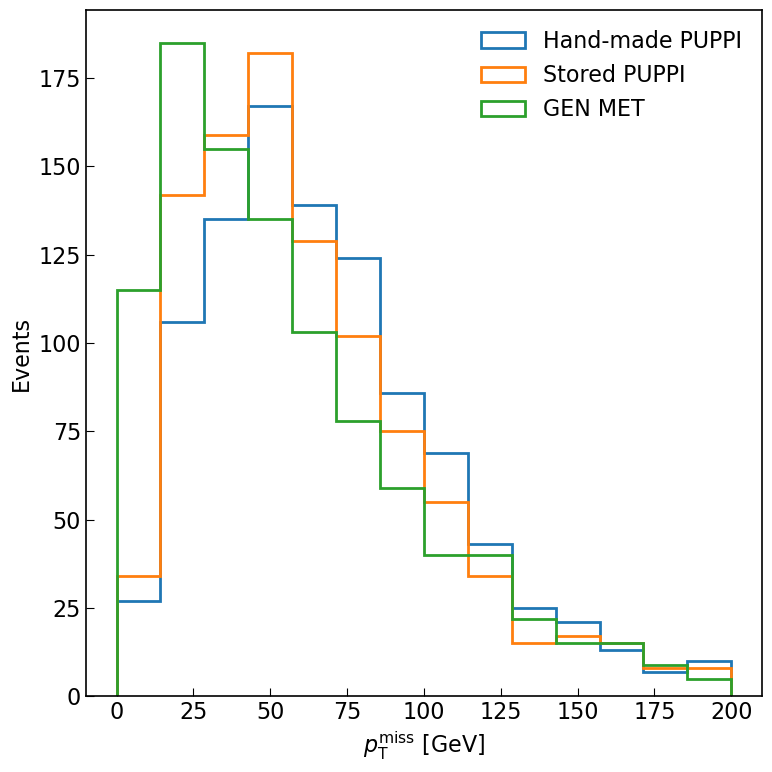

Integral recomputed MET: 972
Integral stored MET: 975


In [119]:
## Add also hand-made PUPPi to the comparison

# ---------- CMS Style ----------
plt.style.use('default')
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.size'] = 3

# ---------- Plot ----------
plt.figure(figsize=(8,8))

bins = np.linspace(0, 200, 15)   # 20 bins → 200/10 GeV
hist_reco, _ = np.histogram(met, bins=bins)
hist_stored, _ = np.histogram(met_stored, bins=bins)
hist_gen, _ = np.histogram(genMet, bins=bins)

plt.hist(met, bins=bins, histtype='step', label='Hand-made PUPPI',
         linewidth=2)
plt.hist(met_stored, bins=bins, histtype='step', label='Stored PUPPI',
         linewidth=2)
plt.hist(genMet, bins=bins, histtype='step', label='GEN MET',
         linewidth=2)

# ---------- Labels ----------
plt.xlabel(r"$p_{\mathrm{T}}^{\text{miss}}$ [GeV]")
plt.ylabel("Events")

plt.legend(frameon=False)

# Remove top/right spines (CMS style)


# ---------- CMS Label ----------
#plt.text(0.02, 0.95, "CMS", transform=plt.gca().transAxes,
#         fontsize=20, fontweight='bold', va='top')
#plt.text(0.14, 0.95, "Preliminary", transform=plt.gca().transAxes,
#         fontsize=16, va='top')

plt.tight_layout()
plt.show()

int_reco = np.sum(hist_reco)
int_stored = np.sum(hist_stored)

print(f"Integral recomputed MET: {int_reco}")
print(f"Integral stored MET: {int_stored}")

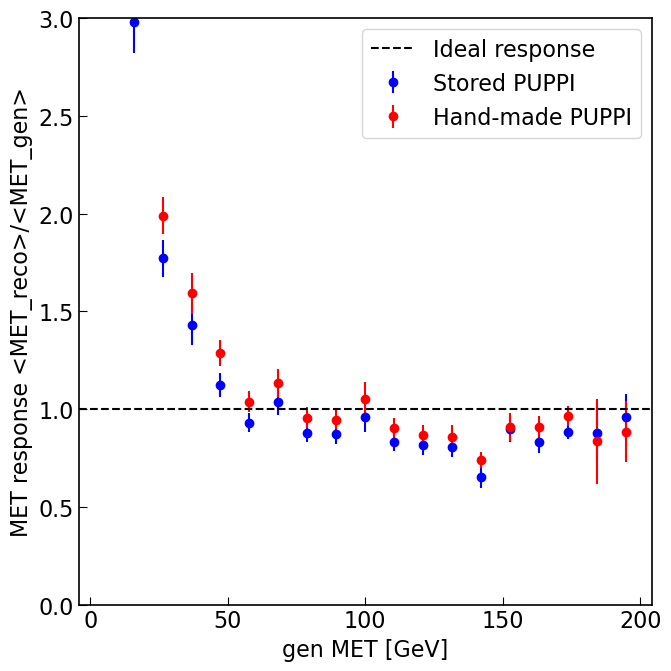

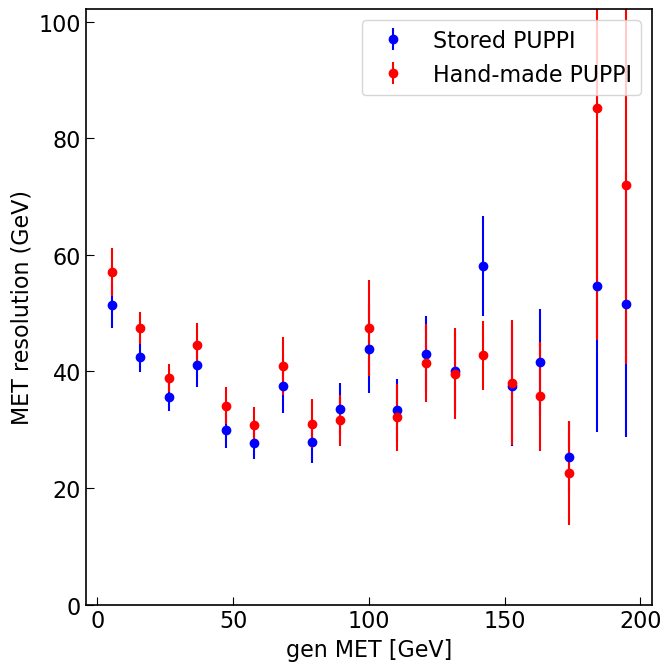

In [122]:
# Assume met_stored = stored puppiMET_pt, met_computed = your recomputed MET
met_stored = np.array(met_stored)
met_computed = np.array(met)

bins = np.linspace(0, 200, 20)
bin_centers = []

response_stored = []
response_computed = []
response_err_stored = []
response_err_computed = []

resolution_stored = []
resolution_computed = []
resolution_err_stored = []
resolution_err_computed = []

for i in range(len(bins)-1):
    mask = (genMet >= bins[i]) & (genMet < bins[i+1])
    if np.sum(mask) == 0:
        continue
    bin_centers.append(0.5*(bins[i]+bins[i+1]))

    # Response
    resp_s = np.mean(met_stored[mask])/np.mean(genMet[mask])
    resp_c = np.mean(met_computed[mask])/np.mean(genMet[mask])
    response_stored.append(resp_s)
    response_computed.append(resp_c)
    response_err_stored.append(np.std(met_stored[mask]/genMet[mask])/np.sqrt(np.sum(mask)))
    response_err_computed.append(np.std(met_computed[mask]/genMet[mask])/np.sqrt(np.sum(mask)))

    # Resolution
    diff_s = met_stored[mask]-genMet[mask]
    diff_c = met_computed[mask]-genMet[mask]
    res_s = np.sqrt(np.mean(diff_s**2))
    res_c = np.sqrt(np.mean(diff_c**2))
    resolution_stored.append(res_s)
    resolution_computed.append(res_c)
    resolution_err_stored.append(np.std(diff_s)/np.sqrt(np.sum(mask)))
    resolution_err_computed.append(np.std(diff_c)/np.sqrt(np.sum(mask)))

# ------------------------
# Response comparison
plt.figure(figsize=(7,7))
plt.errorbar(bin_centers, response_stored, yerr=response_err_stored, fmt='o', label='Stored PUPPI', color='b')
plt.errorbar(bin_centers, response_computed, yerr=response_err_computed, fmt='o', label='Hand-made PUPPI', color='r')
plt.axhline(1.0, color='k', linestyle='--', label='Ideal response')
plt.xlabel("gen MET [GeV]")
plt.ylabel("MET response <MET_reco>/<MET_gen>")
plt.ylim(0, 3)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# ------------------------
# Resolution comparison
plt.figure(figsize=(7,7))
plt.errorbar(bin_centers, resolution_stored, yerr=resolution_err_stored, fmt='o', label='Stored PUPPI', color='b')
plt.errorbar(bin_centers, resolution_computed, yerr=resolution_err_computed, fmt='o', label='Hand-made PUPPI', color='r')
plt.xlabel("gen MET [GeV]")
plt.ylabel("MET resolution (GeV)")
plt.ylim(0, max(max(resolution_stored), max(resolution_computed))*1.2)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
